# Визуализация векторных полей

Рассмотрим способы визуализации векторных и скалярных полей на примере электрического поля, создаваемого несколькими электрическими зарядами.

Как известно из курса физики, на _пробный заряд_ $Q$, помещённый в электрическое поле заряда $q_0$, действует сила Кулона:

$$
\mathbf{F}_0 =
    k \cfrac{q_0 Q}{(\mathbf{r} - \mathbf{r}_0)^2}
    \cfrac{\mathbf{r} - \mathbf{r}_0}{\| \mathbf{r} - \mathbf{r}_0 \|},
$$
где
$k$ - совокупность постоянных вида $k = 1 / (4 \pi \varepsilon_0)$;
$\varepsilon_0$ - диэлектрическая постоянная: $\varepsilon \approx 8.85419 \cdot 10^{-12}$ Ф$\cdot$м$^{-1}$;
$\mathbf{r}_0$ и $\mathbf{r}$ - координаты (радиус-векторы) зарядов $q_0$ и $Q$ соответственно.
Радиус-вектор в трёхмерном пространстве есть набор трёх координат:
$\mathbf{r} = (
    \begin{matrix}
        x & y & z
    \end{matrix}
).$

Электрическое поле, по определению, есть отношение электрической силы, действующей на заряд $Q$, при стремлении величины этого заряда к нулю:

$$
\mathbf{E}_0(\mathbf{r}) =
    \lim_{Q \rightarrow 0}{
        \cfrac{\mathbf{F}_0}{Q}
    } =
    k \cfrac{q_0}{(\mathbf{r} - \mathbf{r}_0)^2}
    \cfrac{\mathbf{r} - \mathbf{r}_0}{\| \mathbf{r} - \mathbf{r}_0 \|}.
$$
где $\mathbf{r}$ - радиус-вектор произвольной точки пространства, в которой требуется посчитать величину поля.

Электрическое поле может создаваться произвольным количеством $n$ зарядов $q_i$.
На рисунке ниже показана расчётная схема.
В этом случае результирующее поле рассчитывается, исходя из _принципа суперпозиции_ - суммарное поле есть сумма полей отдельных зарядов:

$$
\mathbf{E}(\mathbf{r}) =
    \sum\limits_{i=0}^{n-1}{\mathbf{E}_i(\mathbf{r})} =
    k \sum\limits_{i=0}^{n-1}{
        q_i \cfrac{\mathbf{r} - \mathbf{r}_0}{\| \mathbf{r} - \mathbf{r}_0 \|^3}
    }.
$$ (total_field)

![Расчётная схема](pics/charges_xy.png)

Электрическое поле - это _векторное поле_.
Это значит, что в каждой точке пространства $\mathbf{r}$ определена не только величина поля - электрическая напряжённость $E_0$, - но и его направление.
Именно вдоль направления поля $\mathbf{E}$ и действует сила Кулона.
Одним из способов визуализации любого векторного поля является построение его _силовых линий_.
Этим мы сейчас и займёмся - покажем векторное поле {eq}`total_field` для заданной системы зарядов.

## Визуализация векторного поля

С визуализацией нам поможет библиотека Matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# Для работы с массивами
import numpy as np
# Для векторной алгебры
import numpy.linalg as lina
# Вспомогательные константы
from scipy.constants import pi, epsilon_0

Инициализируем постоянную $k$ с программным именем `K` (переменная, набранная caps'ом, интерпретируется Python как постоянная):

In [2]:
K = 1 / (4*pi*epsilon_0)

### Расчёт поля двух зарядов

Программно опишем поле {eq}`total_field`:

In [3]:
def make_field(qs, rs):
    def field(mesh):
        mx, my = mesh
        r = np.vstack([mx.flatten(), my.flatten()])
        return K*superposition(qs, rs, r).reshape(np.shape(mesh))
    
    return field


def superposition(qs, rs, r):
    return np.sum([
        calc_partial_field(qi, ri, r)
        for qi, ri in zip(qs, rs)
    ], axis=0)


def calc_partial_field(qi, ri, r):
    dr = r.T - ri
    return qi*dr.T / lina.norm(dr, axis=1)**3

Данная функция принимает на вход массив зарядов `qs`, массив их координат `rs` и возвращает функцию `E`, зависящую только от `r` - координаты произвольной точки.
Функция `E` соответствует полю {eq}`total_field`.

### Создание расчётной сетки

Опишем функцию создания расчётной сетки в виде множества равномерно распределённых точек двумерного пространства $Oxy$.
В этом случае любой радиус-вектор состоит из двух компонент: $\mathbf{r} = (\begin{matrix} x & y \end{matrix})$.

In [4]:
def create_mesh(x_minmax: tuple, y_minmax: tuple, n: int):
    # Равномерно разбиваем оси
    x = np.linspace(*x_minmax, n)
    y = np.linspace(*y_minmax, n)
    # Создаём сетку
    return np.asarray(np.meshgrid(x, y))

Заодно создадим функцию визуализации сетки для лучшего её представления:

In [5]:
def plot_mesh2d(mesh, figax=None, **kw):
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = figax
    x, y = mesh
    ax.plot(x.flatten(), y.flatten(), ls="", **kw)
    ax.set(xlabel="$x$, м", ylabel="$y$, м")
    return fig, ax

На созданной с помощью `create_mesh` сетке (в её точках) мы и будем считать электрическое поле.

### Исходные данные

Для начала расмотрим электрическое поле, создаваемое двумя одинаковыми зарядами с противоположными знаками:

In [6]:
# Зададим размеры расчётной области:
# - по оси x: от -2 м до 2 м;
# - по оси y: от -2 м до 2 м
x_minmax = -2, 2
y_minmax = -2, 2
# Поместим 2 заряда: слева +1, справа -1
qs = np.array([1, -1])
# Расположим их в точках (-1; 0) и (1; 0)
rs = np.array([[-1, 0], [1, 0]])

Готово.
Можно переходить к расчёту.

### Расчёт поля

Сперва необходимо построить расчётную сетку (расчётные точки):

In [7]:
# Создадим расчётную сетку, разбив оси x и y на 20 точек
mesh = create_mesh(x_minmax, y_minmax, n=20)

Отобразим расчётные точки для проверки корректности сетки:

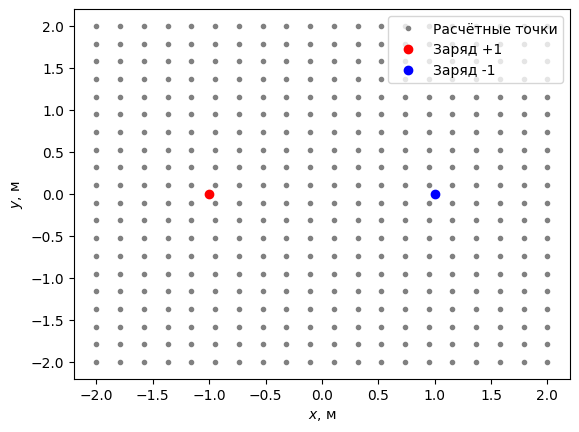

In [8]:
fig, ax = plot_mesh2d(
    mesh, c="grey", marker=".", label="Расчётные точки"
)
# Заодно покажем расположение зарядов
ax.plot(
    rs[0, 0], rs[0, 1],
    ls="", c="red", marker="o", label="Заряд +1"
)
ax.plot(
    rs[1, 0], rs[1, 1],
    ls="", c="blue", marker="o", label="Заряд -1"
)
ax.legend(loc="upper right");

В серых точках и будет рассчитано векторное поле $\mathbf{E}$:

In [9]:
# Рассчитываем поле
E_fun = make_field(qs, rs)
Ex, Ey = E_fun(mesh)
print("Например, (Ex; Ey) в левой нижней точке:",
      (Ex[0, 0], Ey[0, 0]))

Например, (Ex; Ey) в левой нижней точке: (-228632984.6497247, -1224250083.568939)


Поле рассчитано.
Теперь его можно визуализировать.

### Визуализация

За отрисовку векторных полей в Matplotlib отвечает функция [streamplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html):

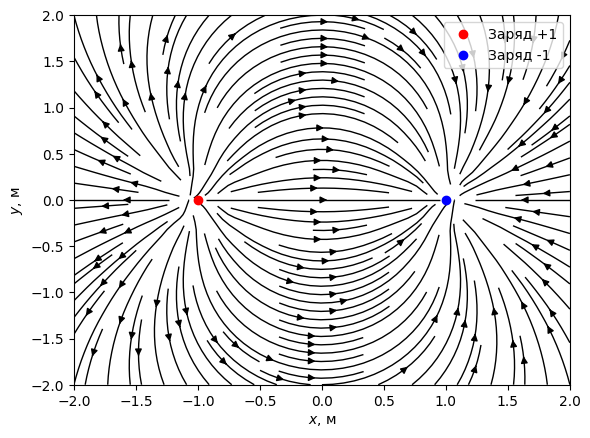

In [10]:
fig, ax = plt.subplots()
mx, my = mesh
# Силовые линии
ax.streamplot(
    mx, my, Ex, Ey,
    density=1.5, color="k", linewidth=1
)
# Сами заряды
ax.plot(
    rs[0, 0], rs[0, 1],
    ls="", c="red", marker="o", label="Заряд +1"
)
ax.plot(
    rs[1, 0], rs[1, 1],
    ls="", c="blue", marker="o", label="Заряд -1"
)
# И для красоты
ax.set(
    xlabel="$x$, м", ylabel="$y$, м"
)
ax.legend(loc="upper right");

Получили вполне непохую картину - силовые линии поля выходят из положительного заряда и входят в заряд отрицательный.

### Поле четырёх зарядов

В качестве дополнительного примера рассмотрим случай четырёх зарядов - двух положительных и двух отрицательных.

Исходные данные:

In [11]:
# Зададим размеры расчётной области:
# - по оси x: от -2 м до 2 м;
# - по оси y: от -2 м до 2 м
x_minmax = -2, 2
y_minmax = -2, 2
# Разместим 4 заряда в форме креста:
# - отрицательные заряды - по вертикали;
# - положительные - по горизонтали
qs = np.array([-1, -1, 1, 1])
rs = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

Рассчитываем поле:

In [12]:
# Создадим расчётную сетку, разбив оси x и y на 50 точек
mesh = create_mesh(x_minmax, y_minmax, n=50)
# Считаем поле в узлах сетки
E_fun = make_field(qs, rs)
Ex, Ey = E_fun(mesh)

Строим график:

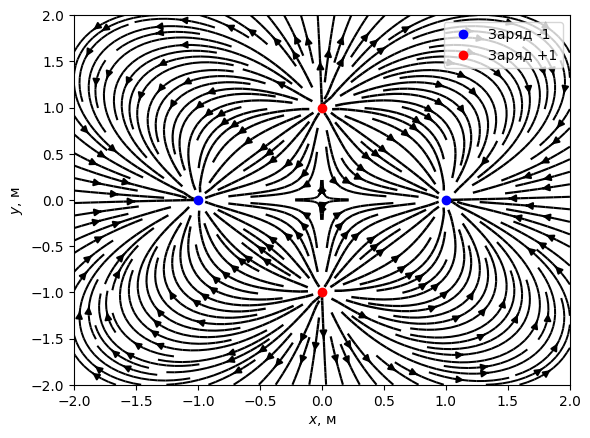

In [24]:
fig, ax = plt.subplots()
mx, my = mesh
# Для переменной величины силовых линий,
# пропорциональной величине поля
E_mag = np.sqrt(Ex**2 + Ey**2)
linewidth = np.log(E_mag) / 15
# Силовые линии
ax.streamplot(
    mx, my, Ex, Ey,
    density=2, color="k", linewidth=linewidth
)
# Сами заряды
ax.plot(
    rs[:2, 0], rs[:2, 1],
    ls="", c="blue", marker="o", label="Заряд -1"
)
ax.plot(
    rs[2:, 0], rs[2:, 1],
    ls="", c="red", marker="o", label="Заряд +1"
)
# И для красоты
ax.set(
    xlabel="$x$, м", ylabel="$y$, м"
)
ax.legend(loc="upper right");

## Упражнения

1. ...